## Sklearn

### Step 1 : What is skleran and why do we use it?
scikit-learn (sklearn) is a python library used for machine learning, it provides simple tools for:
*   Building models(Classification, Regression, Clustering)
*   Splitting Data into Training and testing sets
*   Preprocessing data (Scaling, encoding)
*   Evaluating how well your models work



### Step 2 : Install a Simple Dataset
sklearn has built-in datasets fro practice, one famous one is the iris dataset - measurements of flowers labeled by species

In [1]:
from sklearn.datasets import load_iris

# Explore the data
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[:5])      # First 5 rows
print(iris.target[:5])      # First 5 labels


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


### Step 3 : Split data into training and test sets

We use training data to teach the model, we use test data to see how well it learned.
*   `test_size=0.2` means 20% will be for testing, 80% for training.
*    'random_state_42' ensures reproducibility.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

### Step 4 : Choose A Model

Use a very simple model `KNeighborsClassifier` it predicts based on "nearest neighbors.

For example, if your wanted to go over to your friends houses for a pool party, 3 other friends in your community were thowing pool party. In this case, you would find the "cloest" friends pool party

KNN is simple to understand - it looks at the closest examples in training data and makes a predictions.

*   n_neighbors=3 means

In [3]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

### Step 5 : Train the Model

In [4]:
model.fit(X_train,y_train)   # Set X_train and Y_Train to the model

KNeighborsClassifier(n_neighbors=3)

### Step 6 : Make Predictions

In [5]:
predictions = model.predict(X_test)
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### Step 7 : Evaluate The Model

We measure how good the model is by comparing predictions against real labels.Accuracy is a simple and clear metric from 0.0 to 1.0.

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


## Forecasting

### Step 1 : Load and Explore the dataset

Load the database and explore the data

In [7]:
import pandas as pd

#Load the dataset
data = pd.read_csv('weatherAUS.csv')

# Check the first 4 rows of the dataset
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Step 2 : Visualize Data

In order to see what we are dealing with, we need to visulize the data. We can do that by creating visual the weather data

In [9]:
 #Import needed libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

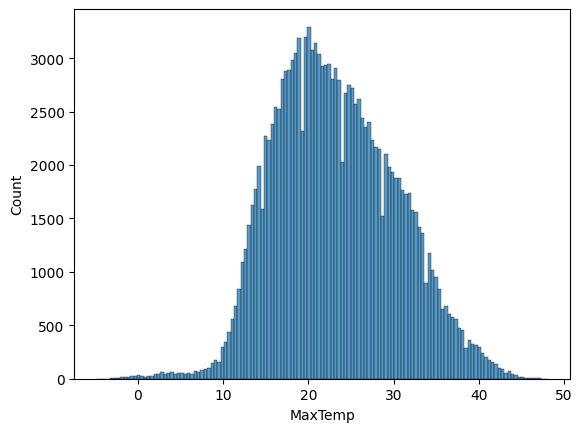

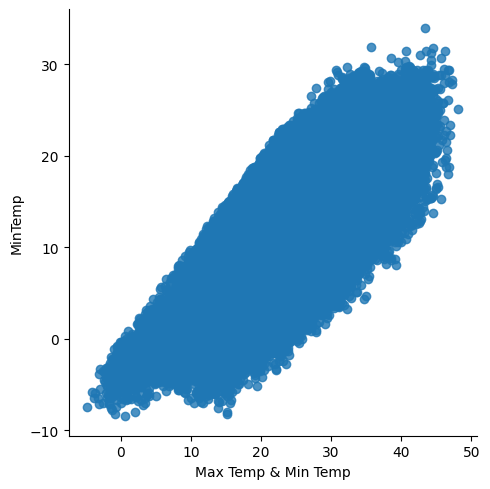

In [10]:
# Histplot
MaxTemp = sns.histplot(data['MaxTemp'])

g = sns.lmplot(
    x='MaxTemp', y='MinTemp',
    data=data, fit_reg=False,
    height=5)
g.set_axis_labels('Max Temp & Min Temp')

<Axes: xlabel='Date', ylabel='MaxTemp'>

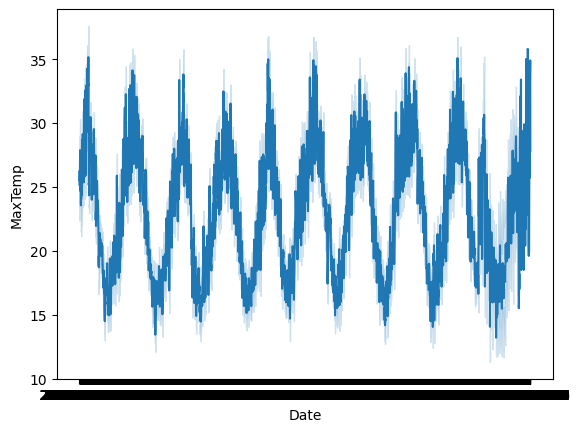

In [11]:
# Line Plot
sns.lineplot(x='Date', y='MaxTemp', data=data)

<Axes: xlabel='Date', ylabel='Rainfall'>

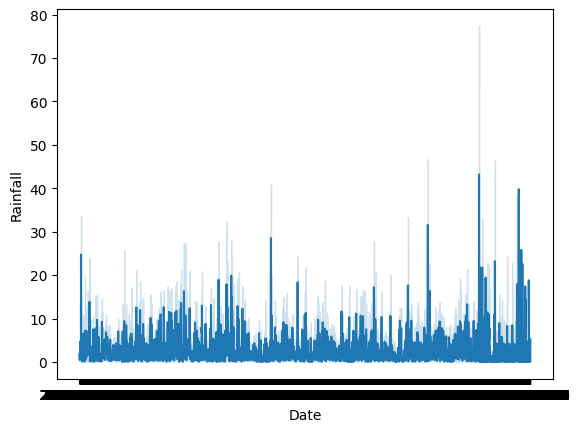

In [12]:
# Line plot
sns.lineplot(x='Date', y='Rainfall', data=data)

<Axes: xlabel='Location', ylabel='MaxTemp'>

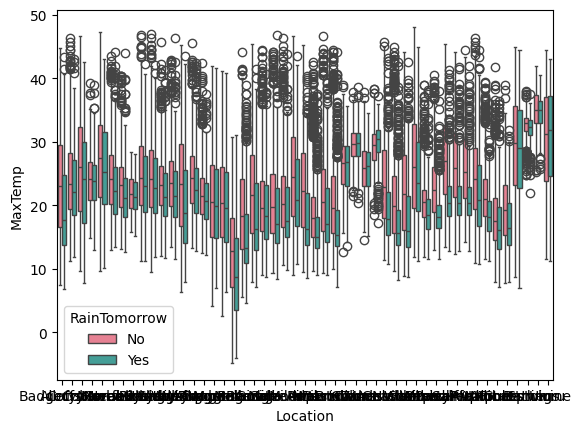

In [13]:
# box plot
sns.boxplot(data=data, x='Location', y='MaxTemp', hue='RainTomorrow',width=0.8,native_scale=True,palette='husl')

In [14]:
# information of the dataset
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
# Create an pandas dataframe
df_rain = pd.DataFrame(data, columns=['RainToday','RainTomorrow'])

In [16]:
 # Convert RainToday & RainTomorrow to from object to Float
df_rain['RainToday'] = df_rain['RainToday'].replace({'No': 0, 'Yes': 1})
df_rain['RainTomorrow'] = df_rain['RainTomorrow'].replace({'No': 0, 'Yes': 1})

<ipython-input-16-41c7c00f6cd5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rain['RainToday'] = df_rain['RainToday'].replace({'No': 0, 'Yes': 1})
<ipython-input-16-41c7c00f6cd5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rain['RainTomorrow'] = df_rain['RainTomorrow'].replace({'No': 0, 'Yes': 1})


In [17]:
# Create a dataframe for humidity9am and Humidity3pm columns
data1 = pd.DataFrame(data, columns=['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm'])

In [18]:
#grouped_hum = sns.subplots(data=data1, x='Humidity9am', y='Pressure9am', kind='bar')

#### HeatMap

In [19]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_cols]

In [20]:
# Heat Map Correclation 1
correlation_matrix = numerical_data.corr()

Text(0.5, 1.0, 'Correlation Heatmap of Weather for Numerical Cols')

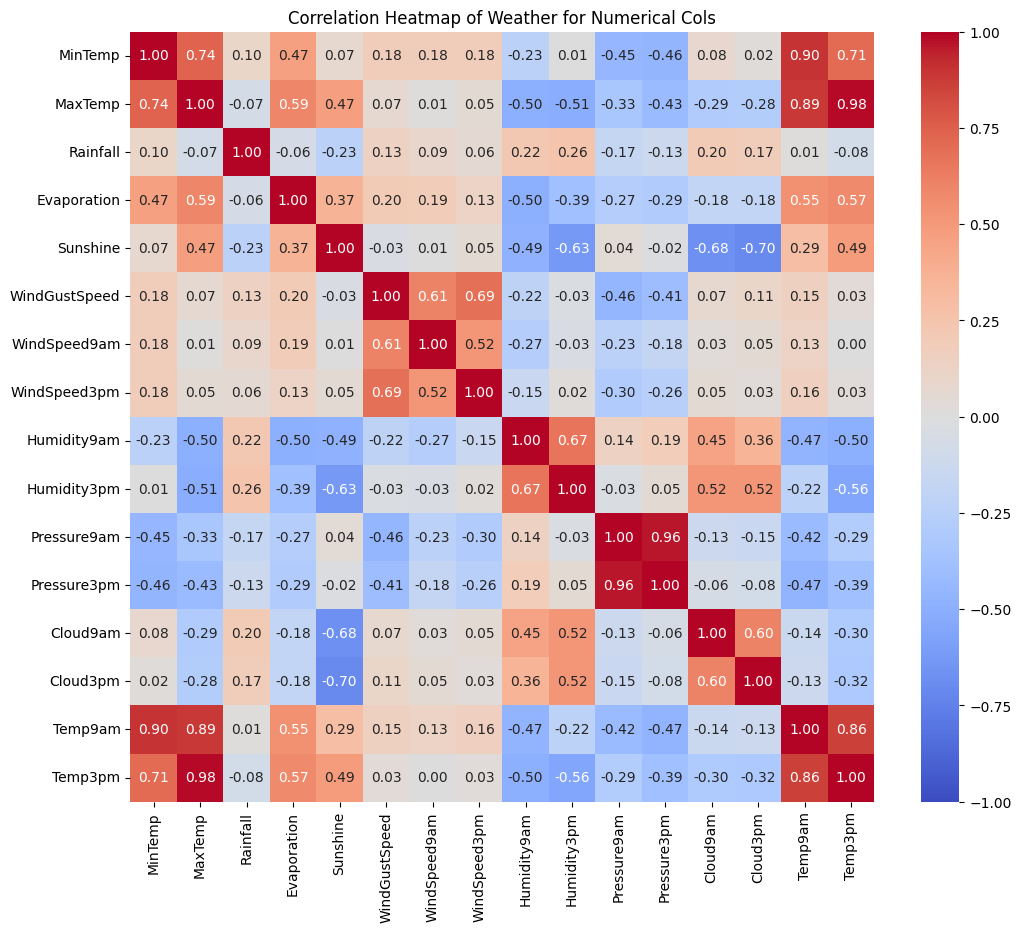

In [21]:
# Heatmap
plt.figure(figsize=(12,10))   # Set the figure size
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',vmin=-1,vmax=1)   # Create the Heatmap
plt.title('Correlation Heatmap of Weather for Numerical Cols')          # Add the title

### Step 3 : Focus on One Location ( Simplify Forecasting)

In [22]:
albury_data = data[data['Location'] == 'Albury'].copy()

# Sort data by City
albury_data['Date'] = pd.to_datetime(albury_data['Date'])
albury_data = albury_data.sort_values(by='Date')
albury_data = albury_data[['Date','MaxTemp']].dropna()

#albury_data['Date'] = pd.to_datetime(albury_data['Date'])
#albury_data = albury_data.reset_index()
albury_data.head()

,Date,MaxTemp
0,2008-12-01,22.9
1,2008-12-02,25.1
2,2008-12-03,25.7
3,2008-12-04,28.0
4,2008-12-05,32.3


### Create A Lag Feature
lag features turn forecasting into a regression problem

In [23]:
# We use the previous days MaxTemp to predict the next day's MaxTemp
albury_data['Lag1'] = albury_data['MaxTemp'].shift(1)
albury_data['Lag2'] = albury_data['MaxTemp'].shift(2)
albury_data['Lag3'] = albury_data['MaxTemp'].shift(3)
albury_data = albury_data.dropna()

albury_data = albury_data.set_index('Date')

In [24]:

print(albury_data.columns)


Index(['MaxTemp', 'Lag1', 'Lag2', 'Lag3'], dtype='object')


### Step 5: Train-Test- Split
We want to predict future data using past data

In [25]:
x = albury_data[['Lag1','Lag2','Lag3']]
y = albury_data['MaxTemp']


split_idx = int(len(x) * 0.8)
X_train, X_test = x.iloc[:split_idx],x.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx],y.iloc[split_idx:]

### Building the Forecasting Model

Linear Regression is a simple but great start, its simple to understand

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Step 7: Make predictions & Evaluate

In [27]:
# Lower RMSE means better predictions
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error

rmse = np.sqrt(mean_absolute_error(y_test,predictions))
print(f'RMSE: {rmse}')

RMSE: 1.6102892620180733


In [28]:
#albury_data.head()

### Step 8 : Visualize Results
Visualization help you see how close the predictions foloow the real temperature

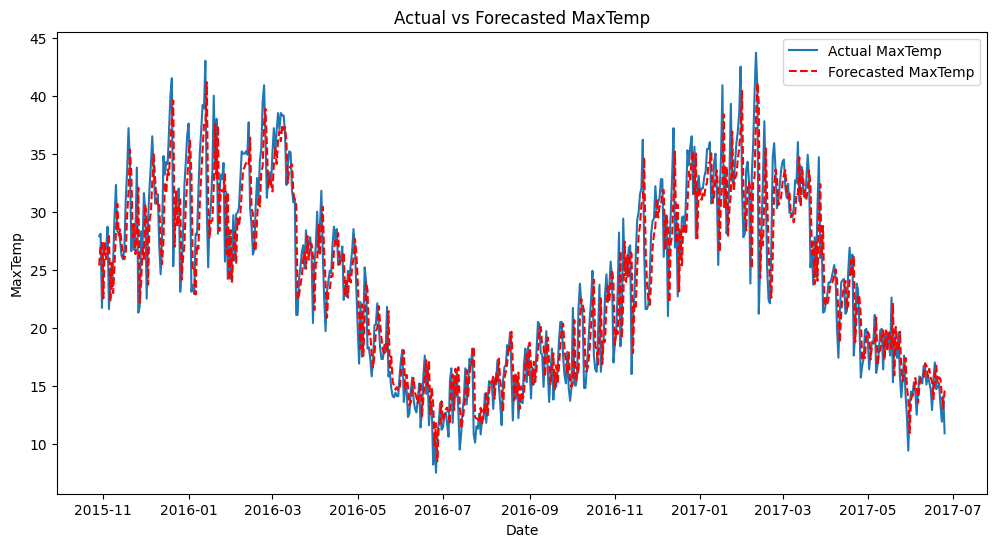

In [29]:

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label="Actual MaxTemp")

plt.plot(y_test.index, predictions, label="Forecasted MaxTemp", linestyle='dashed',color='red')

plt.title('Actual vs Forecasted MaxTemp')
plt.legend()
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.show()

### Step 9 : Improving The Regression

Right now, we using just a couple of lag values, but weather is influnced by more patterns. Here we are adding more lags to our model

In [30]:
# Add more lag Features
for lag in range(4,8):
  albury_data[f'lag_{lag}'] = albury_data['MaxTemp'].shift(lag)
albury_data = albury_data.dropna()

In [31]:
# adding day-of-year, month and maybe sine/consine transforms to capture seasonality
# Temperature follows seasonal cycles, the model will learn yearly patterns better with these sine/cosine features.
albury_data['dayofyear'] = albury_data.index.dayofyear
albury_data['month'] = albury_data.index.month
albury_data['sin_day'] = np.sin(2 * np.pi * albury_data['dayofyear'] / 365)
albury_data['cos_day'] = np.cos(2 * np.pi * albury_data['dayofyear'] / 365)



<ipython-input-31-ebe5e010149d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albury_data['dayofyear'] = albury_data.index.dayofyear
<ipython-input-31-ebe5e010149d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albury_data['month'] = albury_data.index.month
<ipython-input-31-ebe5e010149d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

#### Feature Scaling
It helps models if features are on similar scales, especially if you add larger numerical featuers

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Polynomial Feautures
Linear Regression by itself is a staight-line prediction, polynmial features let it fit gentle curves

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(X_train)
x_train_poly = poly.transform(X_test)

#### Cross-validation
This gives a better estimate of how your model will generalize

In [34]:
from sklearn.model_selection import TimeSeriesSplit,cross_val_score

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(model, x, y, cv=tscv, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(f"Average RMSE: {rmse_scores.mean()}")

[2.71694648 3.24772605 3.07425464 3.41093983 3.17945745]
Average RMSE: 3.1258648862552514


#### Visualization Model Results

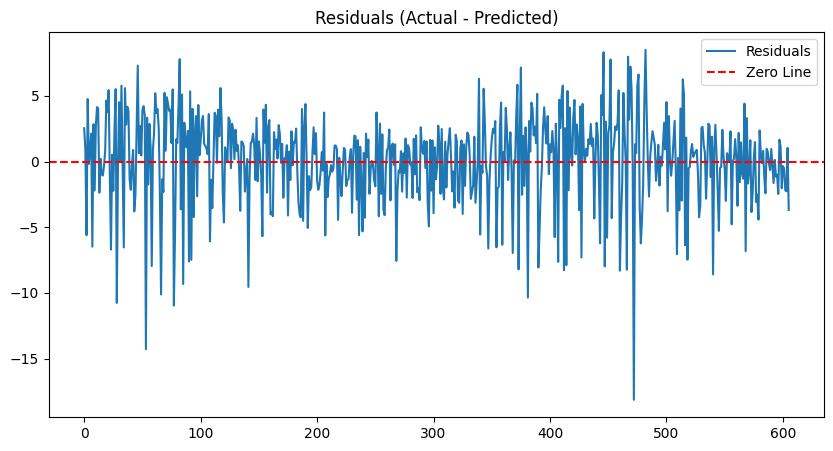

In [35]:
residuals = y_test - predictions
plt.figure(figsize=(10,5))
plt.plot(residuals.values, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')
plt.legend()
plt.title('Residuals (Actual - Predicted)')
plt.show()

* The RMSE scores from time-series cross-validatioin was between 2.7 to 3.4 with an average of about 3.13

* The higher than your single test split RMSE(which was around 1.61)


In [36]:
import zlib

# Original Data
original_data = b"This is a test string."

# Compress the data
compressed_data = zlib.compress(original_data)

# Decompress the data
decompressed_data = zlib.decompress(compressed_data)

# Print the decompressed data
print(decompressed_data.decode('utf-8'))

This is a test string.
